**Seeding for reproductibility**

In [1]:
#set seeds for reproductibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

**Importing the dependencies**

In [2]:
from tensorflow.keras import layers, datasets, models
import matplotlib.pyplot as plt

**Data curation**

In [3]:
#Load and prepare the Fashion MNIST dataset
fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


**Data Processing**

In [4]:
print(train_images[0].shape)

(28, 28)


In [12]:
print(train_images[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

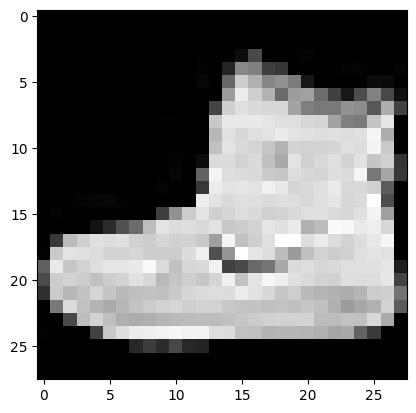

In [8]:
#Display an image from dataset
plt.imshow(train_images[0], cmap='gray')
plt.show()

In [9]:
print(train_labels[0])

9


In [10]:
#normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [11]:
#reshape images to specify that it's a single channel (grayscale)
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [13]:
print(train_images.shape)

(60000, 28, 28, 1)


In [19]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import Sequential

In [24]:
#build the cnn base
model = Sequential()
#32 is kernels or filter-detect several features of image , filter is a matrix represented by 3,3 scans through 28,28 pixels
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
#maxPooling is used to reduce spatial info
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3,3),activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3,3),activation='relu'))
#Add Dense layer on top
#flattens into a one dimensional array
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10))

In [26]:
#compile and train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Model Training**

In [27]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 75s 39ms/step - loss: 0.4907 - accuracy: 0.8210 - val_loss: 0.3626 - val_accuracy: 0.8695
Epoch 2/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.3189 - accuracy: 0.8832 - val_loss: 0.3146 - val_accuracy: 0.8878
Epoch 3/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2716 - accuracy: 0.8998 - val_loss: 0.2879 - val_accuracy: 0.8974
Epoch 4/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.2415 - accuracy: 0.9100 - val_loss: 0.2782 - val_accuracy: 0.8973
Epoch 5/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2177 - accuracy: 0.9190 - val_loss: 0.2720 - val_accuracy: 0.9016
Epoch 6/10
1875/1875 [==============================] - 65s 34ms/step - loss: 0.1958 - accuracy: 0.9273 - val_loss: 0.2583 - val_accuracy: 0.9074
Epoch 7/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1803 - accuracy: 0.9336 - val_loss: 0.2770 -

**MODEL EVALUATION**

In [28]:
#evaluate the model
test_loss, test_acc = model.evaluate(test_images,test_labels, verbose=2)
print('\nTest accuracy: ', test_acc)

313/313 - 3s - loss: 0.2693 - accuracy: 0.9083 - 3s/epoch - 9ms/step

Test accuracy:  0.90829998254776


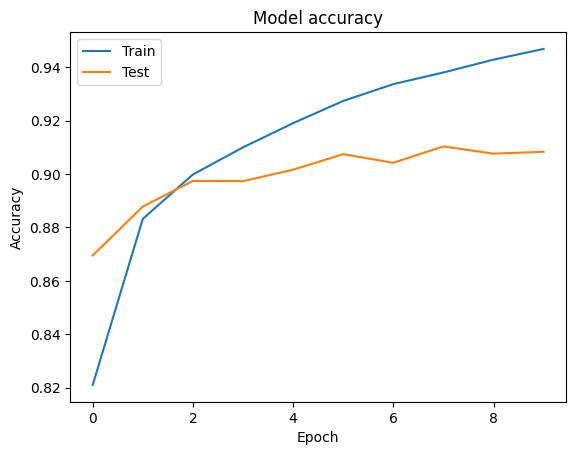

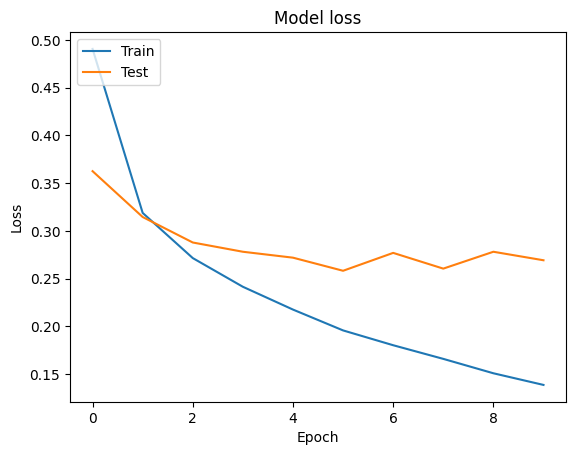

In [31]:
#Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [32]:
model.save('fashion mnist-image_classification.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
